In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [66]:
data = pd.read_csv('./课程素材/StationeryOrder.csv', encoding='utf-8')
data

,id,文具
0,1,笔袋
1,1,文件套
2,1,钢笔
3,2,电脑夹
4,2,橡皮
...,...,...
40050,9834,无线装订本
40051,9835,无孔文件夹
40052,9835,圆珠笔
40053,9835,修正带


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40055 entries, 0 to 40054
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40055 non-null  int64 
 1   文具      40055 non-null  object
dtypes: int64(1), object(1)
memory usage: 626.0+ KB


In [68]:
data[data.duplicated()]

,id,文具


In [69]:
# 定义函数，将数据类型转换成列表
def conversion_data(stationery):
    # 判断文具类别是否已经转成了列表格式
    if str(stationery)[0] == '[':
        # 直接返回文具类别
        return stationery
    # 返回转成列表格式后的文具类别
    return [stationery]

data['文具'] = data['文具'].agg(conversion_data) # 列表可以通过'+'拼接
new_data = data.groupby('id').sum().reset_index()
new_data

,id,文具
0,1,"[笔袋, 文件套, 钢笔]"
1,2,"[电脑夹, 橡皮, 便利贴]"
2,3,[中性笔]
3,4,"[水彩笔, 复写纸, 便利贴]"
4,5,"[包装用品, 书立, 圆珠笔, 中性笔]"
...,...,...
9641,9830,"[文件篮, 订书机, 圆珠笔, 无线装订本, 橡皮]"
9642,9831,"[档案盒, 证书系列, 无孔文件夹, 印章箱, 笔袋, 电脑夹, 凭证单据, 记号笔, 墨水..."
9643,9833,"[证书系列, 无孔文件夹, 笔袋, 票据装订机, 订书机, 胶带座, 圆珠笔, 铅笔, 便利贴]"
9644,9834,"[便签纸, 胶带, 钢笔, 无线装订本]"


In [70]:
results_bre = apriori(new_data['文具'], min_support=0.02, min_confidence=0.45, min_lift=1)
extract_result = []
for result in results_bre:
    # 获取支持度,并保留3位小数
    support = round(result.support, 3)
    # 遍历ordered_statistics对象
    for rule in result.ordered_statistics:
        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)
         # 跳过前件为空的数据
        if head_set == []:
                continue
        # 将前件、后件拼接成关联规则的形式
        related_catogory = str(head_set) + '→' + str(tail_set)
        # 提取置信度，并保留3位小数
        confidence = round(rule.confidence, 3)
        # 提取提升度，并保留3位小数
        lift = round(rule.lift, 3)
        # 查看强关联规则，支持度，置信度，提升度
        print(related_catogory, support, confidence, lift)
        extract_result.append([head_set, tail_set, support, confidence, lift])
        
result_df = pd.DataFrame(extract_result, columns=['前件', '后件', '支持度', '置信度', '提升度'])   
result_df     


['会议记录本']→['中性笔'] 0.027 0.49 1.883
['订书机']→['中性笔'] 0.031 0.473 1.815
['证书系列']→['中性笔'] 0.028 0.497 1.909
['圆珠笔', '便利贴']→['中性笔'] 0.023 0.513 1.969
['中性笔', '活页本']→['圆珠笔'] 0.024 0.474 2.403
['圆珠笔', '活页本']→['中性笔'] 0.024 0.489 1.878


,前件,后件,支持度,置信度,提升度
0,[会议记录本],[中性笔],0.027,0.490,1.883
1,[订书机],[中性笔],0.031,0.473,1.815
2,[证书系列],[中性笔],0.028,0.497,1.909
3,"[圆珠笔, 便利贴]",[中性笔],0.023,0.513,1.969
4,"[中性笔, 活页本]",[圆珠笔],0.024,0.474,2.403
5,"[圆珠笔, 活页本]",[中性笔],0.024,0.489,1.878


In [71]:
# 将“前件”、“后件”列转成字符串，方便后续提取数据
result_df['前件'] = result_df['前件'].astype('str')
result_df['后件'] = result_df['后件'].astype('str')
# 提取后件中“中性笔”的数据
gel_pens = result_df[result_df['后件'] == "['中性笔']"]
# 查看提取好的数据
gel_pens

,前件,后件,支持度,置信度,提升度
0,['会议记录本'],['中性笔'],0.027,0.490,1.883
1,['订书机'],['中性笔'],0.031,0.473,1.815
2,['证书系列'],['中性笔'],0.028,0.497,1.909
3,"['圆珠笔', '便利贴']",['中性笔'],0.023,0.513,1.969
5,"['圆珠笔', '活页本']",['中性笔'],0.024,0.489,1.878


In [72]:
# 按照“支持度”对提取的数据进行排序
gel_pens = gel_pens.sort_values('支持度').reset_index(drop=True)
# 查看排序后的数据
gel_pens

,前件,后件,支持度,置信度,提升度
0,"['圆珠笔', '便利贴']",['中性笔'],0.023,0.513,1.969
1,"['圆珠笔', '活页本']",['中性笔'],0.024,0.489,1.878
2,['会议记录本'],['中性笔'],0.027,0.490,1.883
3,['证书系列'],['中性笔'],0.028,0.497,1.909
4,['订书机'],['中性笔'],0.031,0.473,1.815


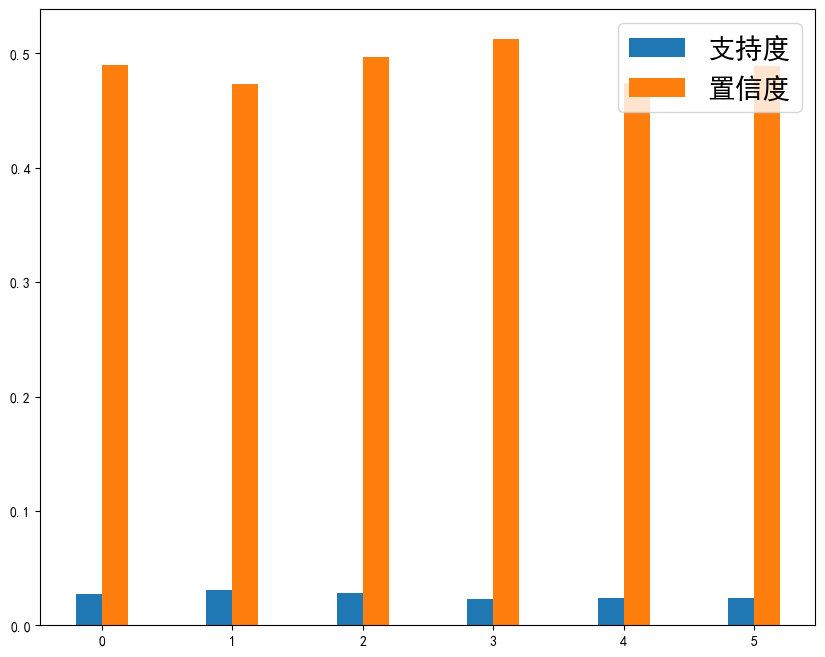

In [74]:
# 3.4 数据分析  
# 步骤一：设置 x、y 坐标值
# 步骤二：对前件和后件的支持度、置信度数值进行数据展现
plt.figure(figsize=(10, 8))

# 设置横纵坐标以及柱子的宽度
width = 0.2
plt.rcParams['font.family'] = ['SimHei']

# 画出柱状图
plt.bar(result_df.index-width/2, result_df['支持度'], width=width)
plt.bar(result_df.index+width/2, result_df['置信度'], width=width)

# 设置图例
plt.legend(['支持度', '置信度'], fontsize=20)

In [76]:
# 设置柱子的宽度
width = 0.2
# 设置 x 的坐标值
x = gel_pens.index
x1 = x-width/2
x2 = x+width/2
# 设置 y 的坐标值
y1 = gel_pens['支持度']
y2 = gel_pens['置信度']

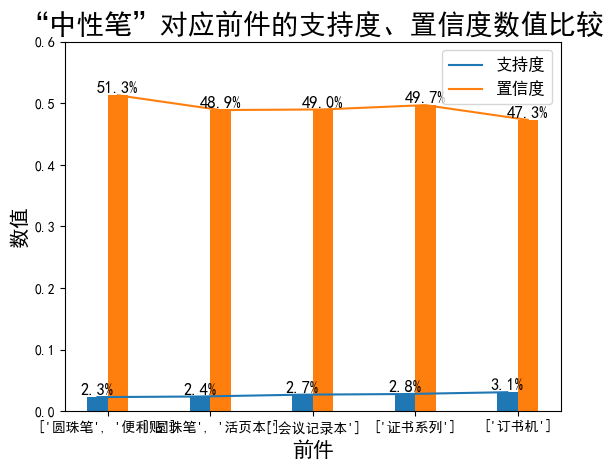

In [79]:
# 绘制多组柱状图
plt.bar(x1, y1, width=width)
plt.bar(x2, y2, width=width)
plt.plot(x1, y1)
plt.plot(x2, y2)

# 设置图表标题名及字体大小
plt.title('“中性笔”对应前件的支持度、置信度数值比较', fontsize=20)

# 设置 x 坐标轴的刻度
plt.xticks(x, gel_pens['前件'])

# 设置坐标轴的标题名及字体大小
plt.xlabel('前件', fontsize=15)
plt.ylabel('数值', fontsize=15)

# 设置 y 轴的数值显示范围
plt.ylim(0, 0.6)

# 设置图例
plt.legend(['支持度', '置信度'], fontsize=12)

# 设置数据标签
for a, b in zip(x1, y1):
    plt.text(a, b, str(round(b*100, 1))+'%',
            ha='center', va='bottom', fontsize=12)
for a, b in zip(x2, y2):
    plt.text(a, b, str(round(b*100, 1))+'%',
            ha='center', va='bottom', fontsize=12)

In [ ]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt

# 读取【StationeryOrder.csv】文件数据，相对路径为'./工作/StationeryOrder.csv'
data = pd.read_csv('./工作/StationeryOrder.csv', encoding='utf-8')

# 查看数据的前 10 行信息
data.head(10)


# 查看数据基本信息
data.info()
# 查看数据中的重复行
data[data.duplicated()]
# 查看数据的描述性统计信息
data.describe()

# 定义函数，将数据类型转换成列表


def conversion_data(stationery):
    # 判断文具类别是否已经转成了列表格式
    if str(stationery)[0] == '[':
        # 直接返回文具类别
        return stationery
    # 返回转成列表格式后的文具类别
    return [stationery]


# 将“文具”列数据由“字符串”格式转变为“包含单个字符串的列表”格式
data['文具'] = data['文具'].agg(conversion_data)
# 将同一“id”的“包含单个字符串的列表”数据聚合为“包含多个字符串的列表”数据，并重置索引
new_data = data.groupby('id').sum().reset_index()

# 设置最小支持度、最小置信度以及最小提升度分别为：0.02、0.45、1
results = apriori(new_data['文具'], min_support=0.02,
                min_confidence=0.45, min_lift=1)
# 创建列表
extract_result = []

for result in results:
    # 获取支持度,并保留3位小数
    support = round(result.support, 3)

    # 遍历ordered_statistics对象
    for rule in result.ordered_statistics:
        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)

        # 跳过前件为空的数据
        if head_set == []:
            continue

        # 提取置信度，并保留3位小数
        confidence = round(rule.confidence, 3)
        # 提取提升度，并保留3位小数
        lift = round(rule.lift, 3)

        # 将提取的数据保存到提取列表中
        extract_result.append([head_set, tail_set, support, confidence, lift])

# 将数据转化为 DataFrame 的格式
result_df = pd.DataFrame(extract_result, columns=[
    '前件', '后件', '支持度', '置信度', '提升度'])


# 将“前件”、“后件”列转成字符串，方便后续提取数据
result_df['前件'] = result_df['前件'].astype('str')
result_df['后件'] = result_df['后件'].astype('str')
# 提取后件中“中性笔”的数据
gel_pens = result_df[result_df['后件'] == "['中性笔']"]
# 按照“支持度”对提取的数据进行排序
gel_pens = gel_pens.sort_values('支持度')


# 获取重置后的索引
df_index = gel_pens.reset_index().index
# 设置 柱子的宽度
width = 0.2
# 设置 x 的坐标值
x = df_index
x1 = x-width/2
x2 = x+width/2
# 设置 y 的坐标值
y1 = gel_pens['支持度']
y2 = gel_pens['置信度']


# 设置字体
plt.rcParams['font.family'] = ['Source Han Sans CN']
# 设置画布尺寸
plt.figure(figsize=(10, 6))

# 绘制多组柱状图
plt.bar(x1, y1, width=width)
plt.bar(x2, y2, width=width)

# 设置图表标题名及字体大小
plt.title('“中性笔”对应前件的支持度、置信度数值比较', fontsize=20)

# 设置 x 坐标轴的刻度
plt.xticks(x, gel_pens['前件'])

# 设置坐标轴的标题名及字体大小
plt.xlabel('前件', fontsize=15)
plt.ylabel('数值', fontsize=15)

# 设置 y 轴的数值显示范围
plt.ylim(0, 0.6)

# 设置图例
plt.legend(['支持度', '置信度'], fontsize=12)

# 设置数据标签
for a, b in zip(x1, y1):
    plt.text(a, b, str(round(b*100, 1))+'%',
            ha='center', va='bottom', fontsize=12)
for a, b in zip(x2, y2):
    plt.text(a, b, str(round(b*100, 1))+'%',
            ha='center', va='bottom', fontsize=12)
